#   <div style="text-align: center;"> Diamond Price Prediction  </div>

**Author:** Nour Sfar  
March 2023
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Importing Libraries 

In [1]:
import torch
import numpy as np  
import pandas as pd  
from scipy import stats 
import matplotlib.pyplot as plt  

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns

In [4]:
from tabulate import tabulate

# Loading data

In [5]:
data = sns.load_dataset('diamonds')

In [6]:
matricule = 2200008 #Insérer le numéro/matricule de la carte d'étudiant
dfn = data.sample(220, random_state = matricule)

In [7]:
# Preview the top (five) rows of the dataset
dfn.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
28962,0.31,Premium,I,VS2,59.9,60.0,435,4.41,4.44,2.65
36397,0.31,Ideal,E,VS1,61.7,56.0,942,4.41,4.37,2.71
21905,1.52,Very Good,H,SI1,62.5,59.0,9973,7.26,7.37,4.57
27220,2.36,Ideal,H,SI2,62.2,55.0,17569,8.51,8.56,5.30
8498,1.10,Very Good,H,SI2,62.9,58.0,4422,6.53,6.56,4.12


In [8]:
# Preview the little information about dataset
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 28962 to 38336
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    220 non-null    float64 
 1   cut      220 non-null    category
 2   color    220 non-null    category
 3   clarity  220 non-null    category
 4   depth    220 non-null    float64 
 5   table    220 non-null    float64 
 6   price    220 non-null    int64   
 7   x        220 non-null    float64 
 8   y        220 non-null    float64 
 9   z        220 non-null    float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 15.3 KB


In [9]:
# Price is int64, best if all numeric attributes have the same datatype
dfn["price"] = dfn["price"].astype(float)

It's easier to work a dataset when all its attributes are numerical. The cut, color and clarity attributes are non-numeric (They are objects). We still have to convert them to be numerical.

# Create a Test Set

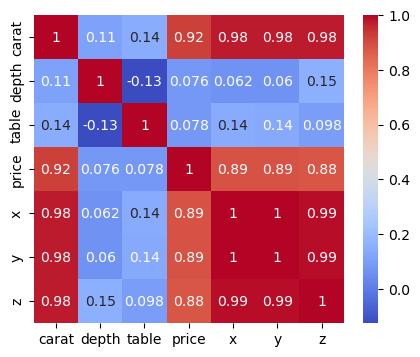

In [10]:
plt.figure(figsize = (5,4))
sns.heatmap(dfn.corr(),annot = True , cmap = 'coolwarm' );

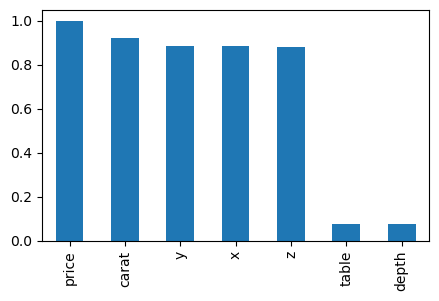

In [11]:
corr_mat = dfn.corr()
plt.figure(figsize = (5,3))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

We can conclude that carat,x,y & z features have strong correlation with price variable.
Depth and table has a very weak relation with price variable. Hence, we can drop these features from the final list of input features to the model.

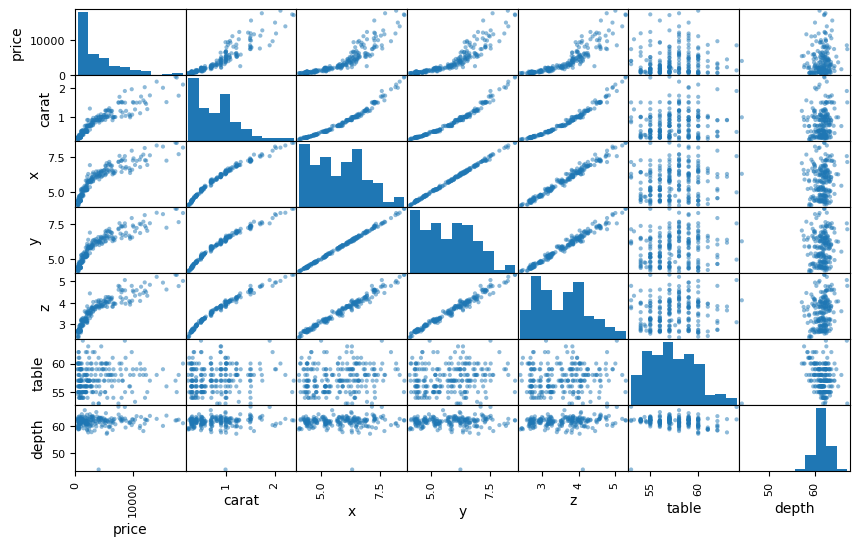

In [12]:
attribs = ["price","carat","x","y","z","table","depth"]
pd.plotting.scatter_matrix(dfn[attribs],figsize=(10,6),diagonal="hist");

Let’s have a sense of categorical features with respect to target (price) variable by using box plots.

<img src="violinplot.png" style="width:10CM; height:8CM/" >

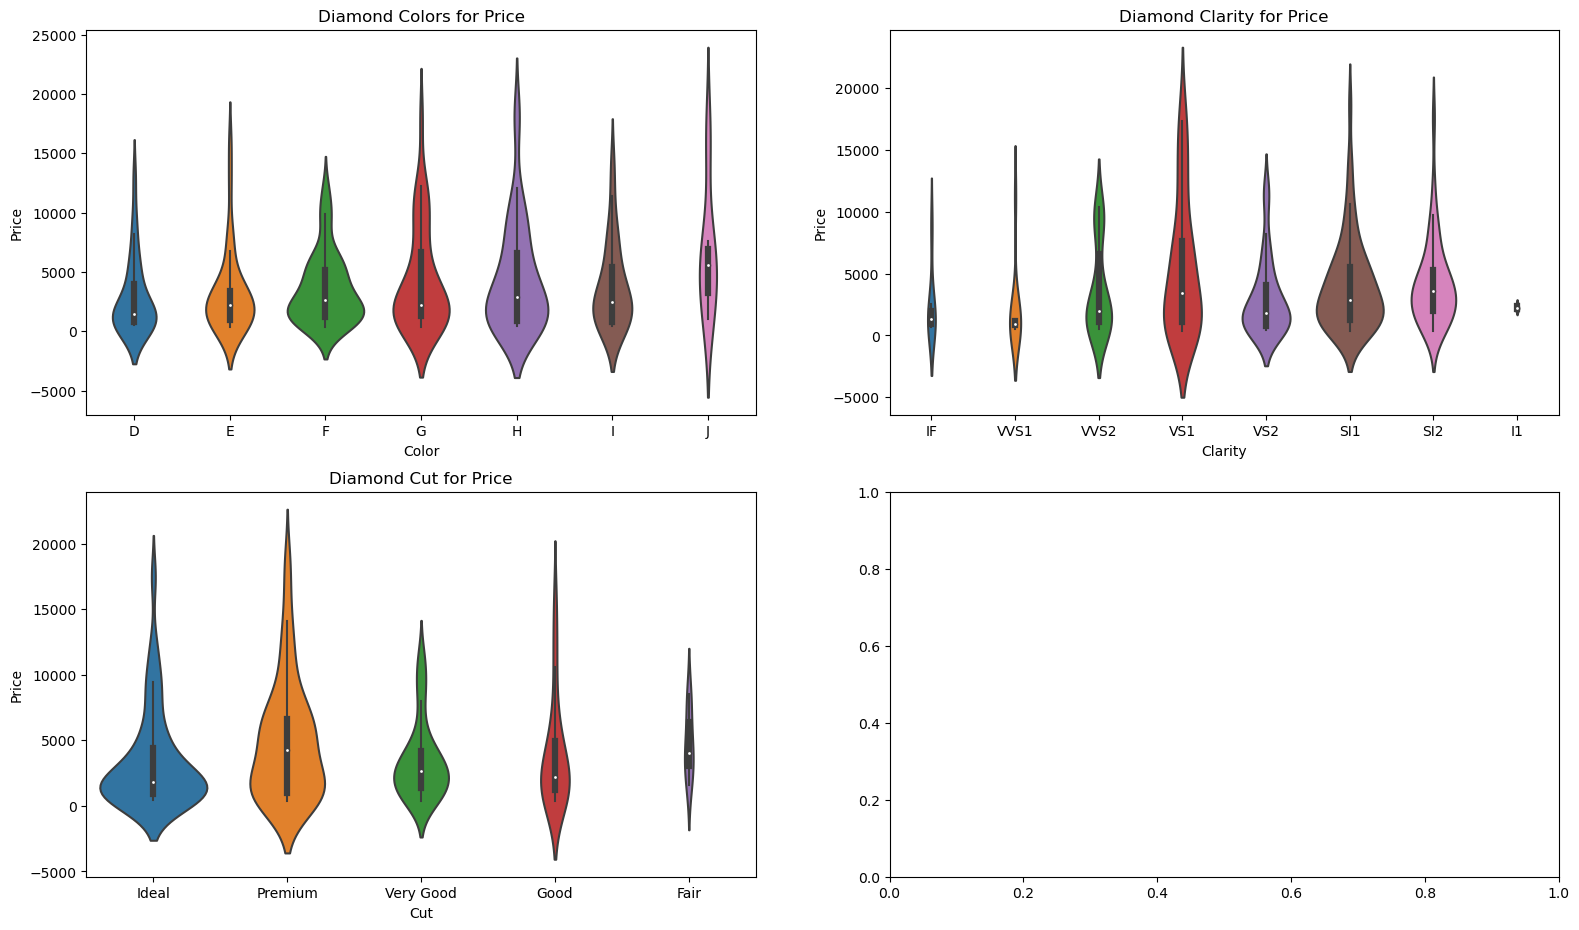

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(19,11))

sns.violinplot(x="color",y="price", data=dfn,scale= "count" ,ax=axs[0,0])
axs[0,0].set_title("Diamond Colors for Price")
axs[0,0].set_ylabel("Price")
axs[0,0].set_xlabel("Color")

sns.violinplot(x="clarity",y="price", data=dfn,scale= "count" ,ax=axs[0,1])
axs[0,1].set_title("Diamond Clarity for Price")
axs[0,1].set_ylabel("Price")
axs[0,1].set_xlabel("Clarity")

sns.violinplot(x="cut",y="price", data=dfn,scale= "count" ,ax=axs[1,0])
axs[1,0].set_title("Diamond Cut for Price")
axs[1,0].set_ylabel("Price")
axs[1,0].set_xlabel("Cut");


I have used the violinplot to compare the data spread, central tendencies (Median), variability amongst the categories of a given categorical variable and these plots also helps to identify the outliers.

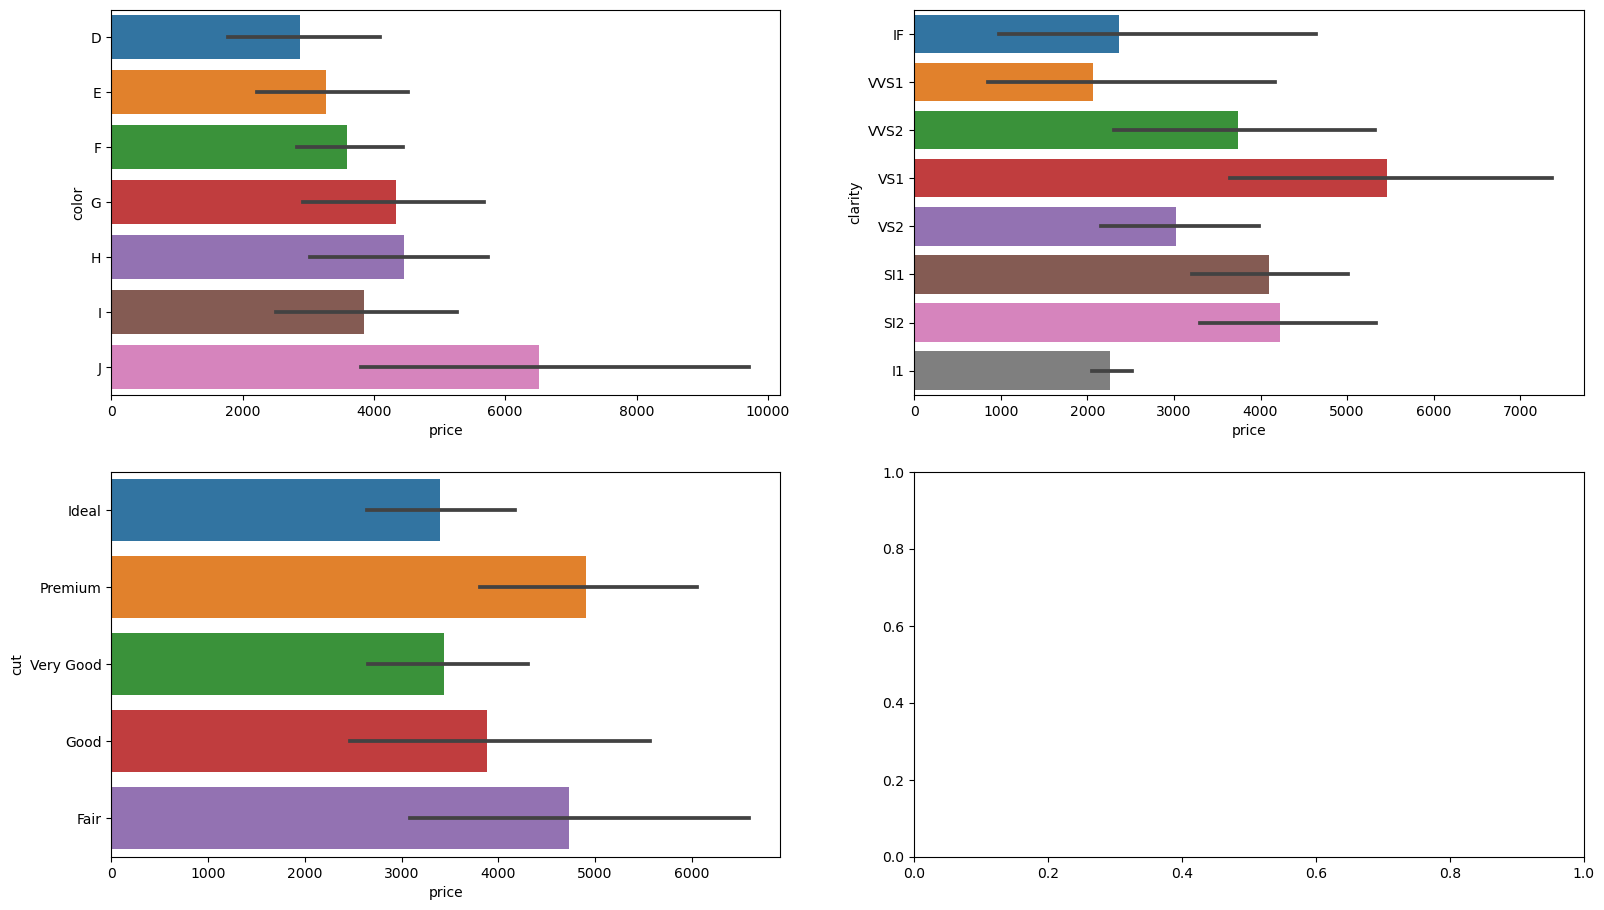

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(19,11))
sns.barplot(x = "price", y = "color", data = dfn, ax=axs[0,0])
sns.barplot(x = "price", y = "clarity", data = dfn, ax=axs[0,1])
sns.barplot(x = "price", y = "cut", data = dfn, ax=axs[1,0]);

# Encoding Categorical data

Before proceeding to build the model, it is good to convert the categorical data to numerical data and there are two ways to convert to numerical form 1. Label Encoder or Integer Encoding 2. One-hot Encoding

In [15]:
dfn_one_hot_encoding = pd.get_dummies(dfn)
dfn_one_hot_encoding.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
28962,0.31,59.9,60.0,435.0,4.41,4.44,2.65,0,1,0,...,1,0,0,0,0,0,1,0,0,0
36397,0.31,61.7,56.0,942.0,4.41,4.37,2.71,1,0,0,...,0,0,0,0,0,1,0,0,0,0
21905,1.52,62.5,59.0,9973.0,7.26,7.37,4.57,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27220,2.36,62.2,55.0,17569.0,8.51,8.56,5.30,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8498,1.10,62.9,58.0,4422.0,6.53,6.56,4.12,0,0,1,...,0,0,0,0,0,0,0,0,1,0


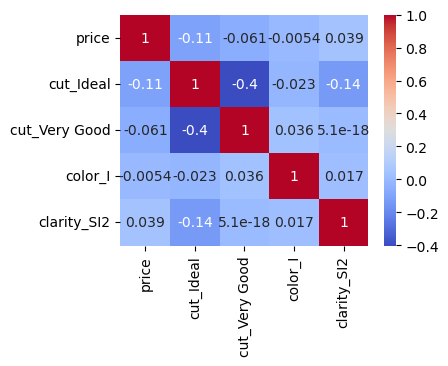

In [16]:
plt.figure(figsize = (4,3))
corr = dfn_one_hot_encoding[['price','cut_Ideal', 'cut_Very Good', 'color_I', 'clarity_SI2']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm");

**Since these qualitative variables are not correlated with the price, it is unnecessary to include them in our predictive model**

# Statistics Descriptive

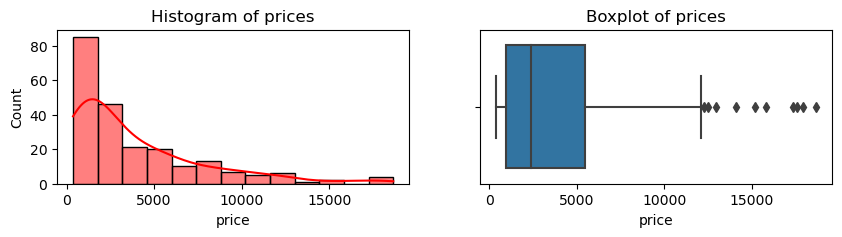

In [17]:
# "price"

# Create a figure with 2 subplots: a histogram and a boxplot for the 'price' column
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,2))

sns.histplot(x='price', data=dfn, ax=axs[0], kde=True, color="red") 
sns.boxplot(x='price', data=dfn, ax=axs[1]) 

# Add titles to the subplots
axs[0].set_title("Histogram of prices")
axs[1].set_title("Boxplot of prices");

**Interpretation:**

- Histogram_price: The distribution of the 'price' variable is strongly skewed to the right

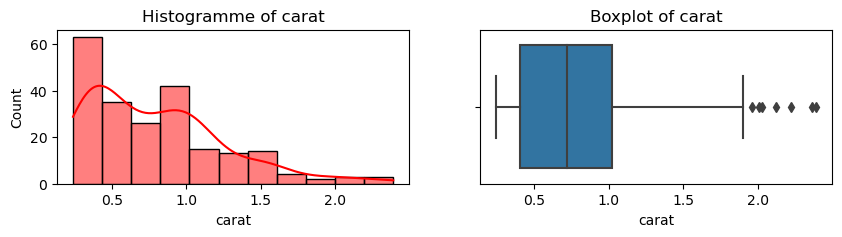

In [18]:
# "carat"

#Create a figure with 2 subplots: a histogram and a boxplot for the 'carat' column
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,2))

sns.histplot(x='carat', data=dfn, ax=axs[0], kde=True, color="red") 
sns.boxplot(x='carat', data=dfn, ax=axs[1]) 

# Add titles to the subplots
axs[0].set_title("Histogramme of carat")
axs[1].set_title("Boxplot of carat");

**Interpretation:**

- Histogram_carat: The distribution of the 'carat' variable is bimodal, suggesting that there are two distinct groups of diamonds. It can be seen that the majority of diamonds have a carat weight of less than 1, which is more common. The other group of diamonds, which have a carat weight greater than 1, is less frequent, as shown in the histogram.

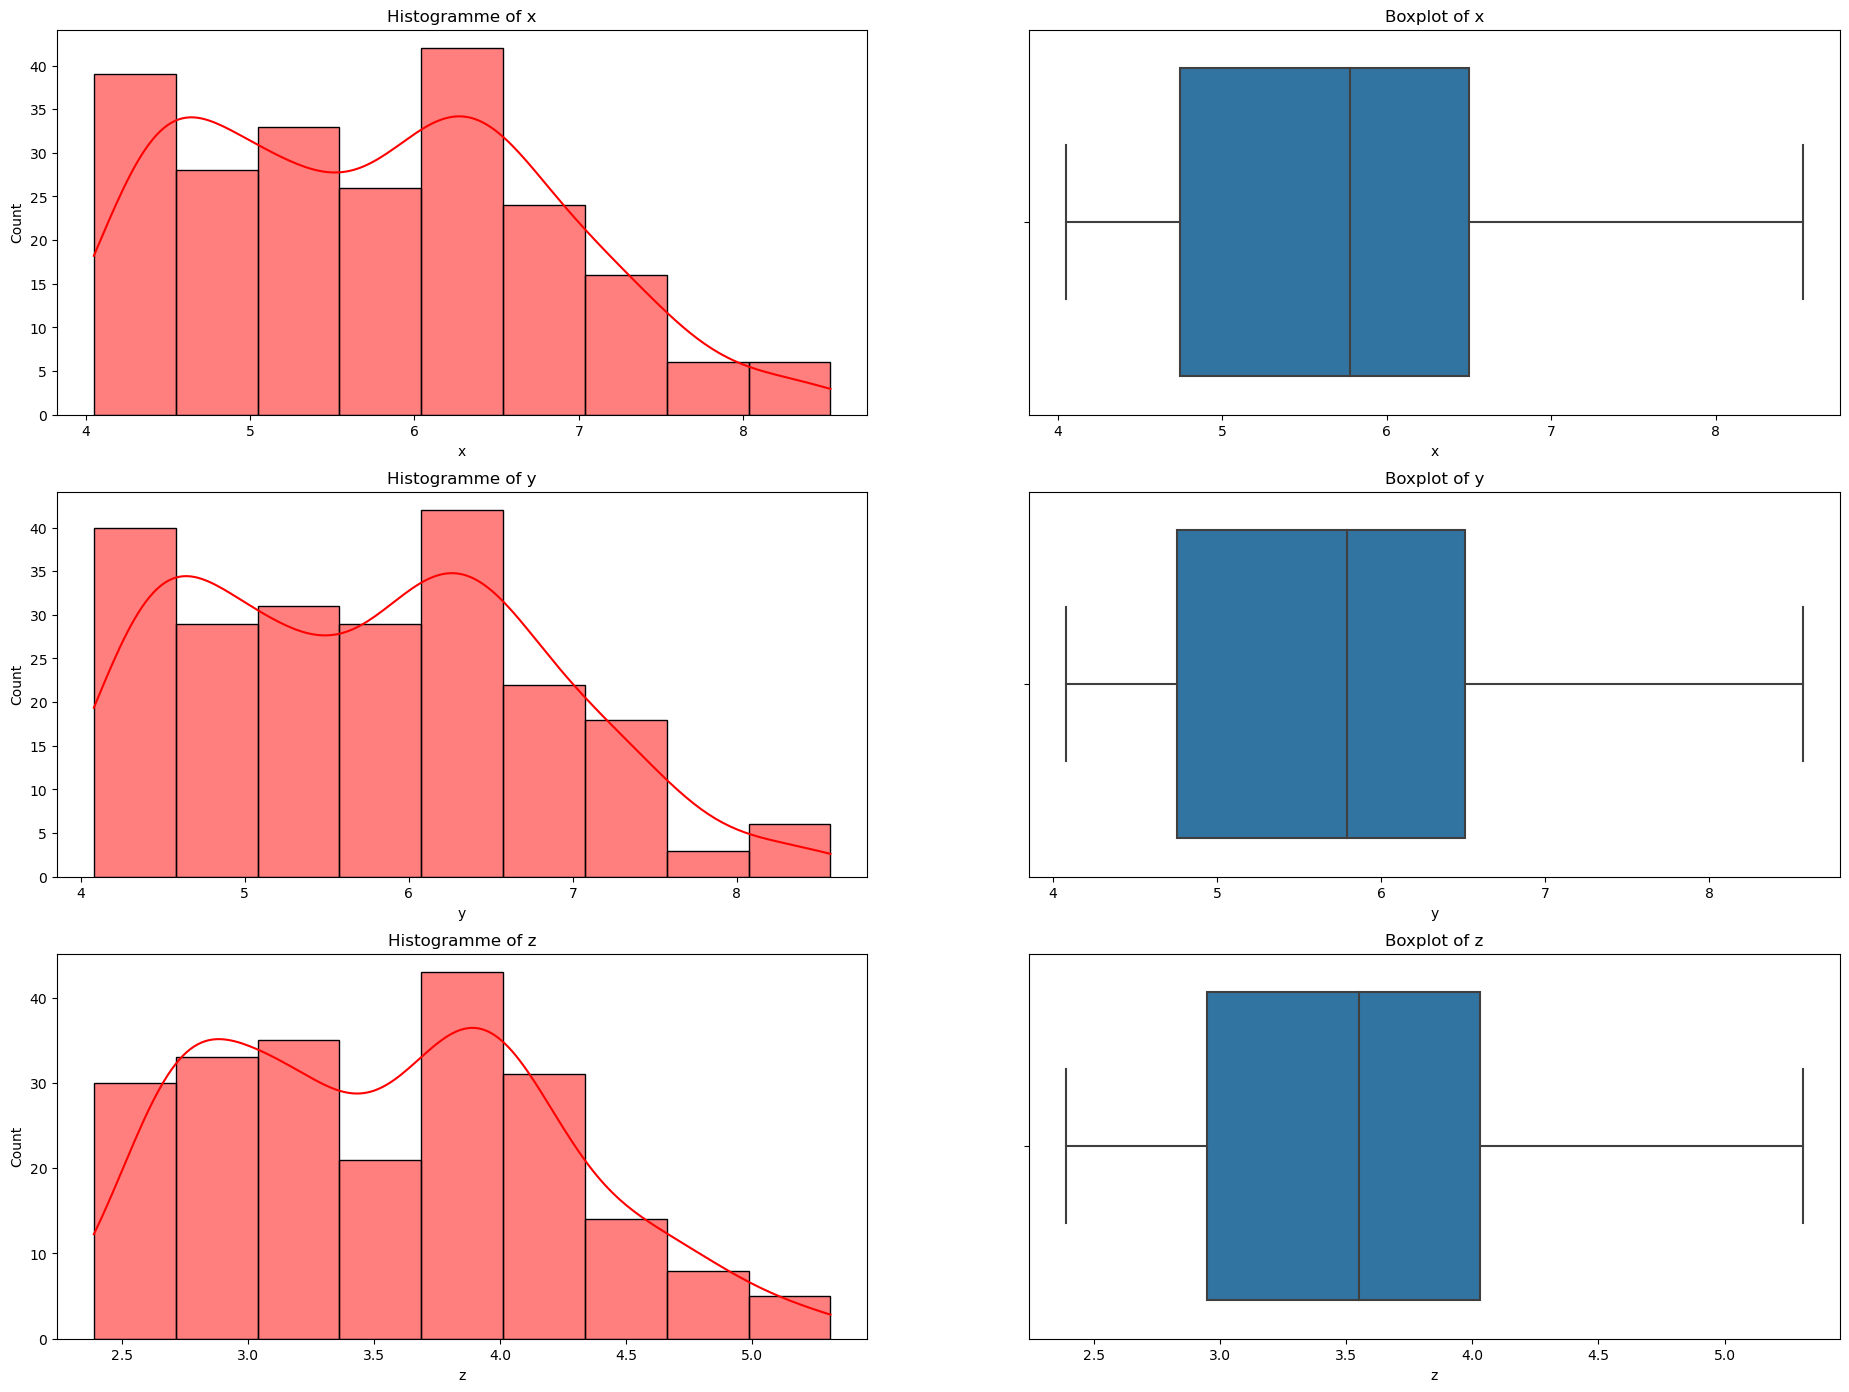

In [19]:
# "x, y et z"
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(23,17))


sns.histplot(x='x', data=dfn, ax=axs[0,0], kde=True, color="red") 
sns.boxplot(x='x', data=dfn, ax=axs[0,1])  

sns.histplot(x='y', data=dfn, ax=axs[1,0], kde=True, color="red")
sns.boxplot(x='y', data=dfn, ax=axs[1,1]) 

sns.histplot(x='z', data=dfn, ax=axs[2,0], kde=True, color="red") 
sns.boxplot(x='z', data=dfn, ax=axs[2,1]) 


axs[0,0].set_title("Histogramme of x")
axs[0,1].set_title("Boxplot of x")

axs[1,0].set_title("Histogramme of y")
axs[1,1].set_title("Boxplot of y")

axs[2,0].set_title("Histogramme of z")
axs[2,1].set_title("Boxplot of z");

**Note:**

- Tukey plots provide approximate estimates of the central tendency of each variable, such as medians, quartiles, etc. These estimates will be calculated precisely in the next section. The plots also allow us to visualize the location of outliers in our dataset.

In [20]:
df=dfn[['price','carat','x','y','z']]
df_stats=df.describe()
df_std=df.std()  

std_err=df_std/(len(df)**0.5)
conf_int=std_err*1.96
df_stats.loc['stand_dev']=df_std
df_stats.loc['std_err']=std_err
df_stats.loc['conf_int_95']=conf_int

print(tabulate(df_stats, headers='keys', showindex=True))

                 price        carat            x            y            z
-----------  ---------  -----------  -----------  -----------  -----------
count          220      220          220          220          220
mean          3910.67     0.802091     5.75314      5.75377      3.55341
std           3872.1      0.459608     1.08093      1.0737       0.680454
min            373        0.24         4.05         4.08         2.39
25%            979        0.4          4.74         4.7575       2.95
50%           2374        0.715        5.775        5.79         3.55
75%           5448.5      1.02         6.4975       6.5125       4.03
max          18656        2.39         8.53         8.57         5.31
stand_dev     3872.1      0.459608     1.08093      1.0737       0.680454
std_err        261.057    0.0309868    0.0728761    0.0723891    0.0458762
conf_int_95    511.672    0.060734     0.142837     0.141883     0.0899173


**Interpretation :**
The table shows the statistical summary of our dataset, with information on the price, carat (weight), and physical dimensions (length, width, and depth). The table has 6 columns with the following headings:

* "price": the price of the diamond in US dollars.
* "carat": the weight of the diamond in carats.
* "x": the length of the diamond in millimeters.
* "y": the width of the diamond in millimeters.
* "z": the depth of the diamond in millimeters.

The first row of the table provides the count of the number of diamonds in the dataset, which is 220. The following rows provide various statistical measures of the dataset, including the mean, standard deviation, minimum, maximum, quartiles, standard error, and 95% confidence interval.

For example, the mean price of the diamonds is 3910.67 💲 the mean carat weight is 0.802091 carats, and the mean length, width, and depth are 5.75314 mm, 5.75377 mm, and 3.55341 mm, respectively. The standard deviation of the price, carat weight, and dimensions are also provided, as well as other measures of central tendency and variability.

# Plotting variables in 3D

In [21]:
dt = dfn.copy(deep=True)
x_array = dt[['x']].to_numpy()
carat_array = dt[['carat']].to_numpy()
price_array = dt[['price']].to_numpy()

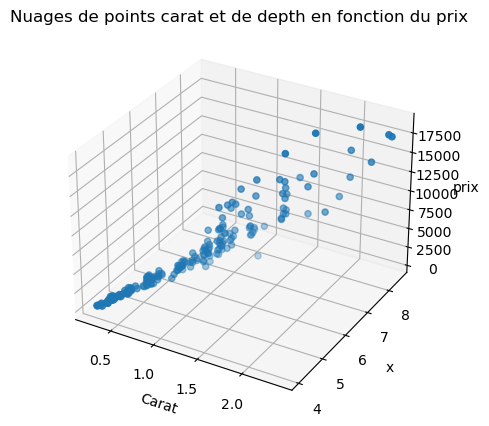

In [22]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(carat_array, x_array, price_array)
ax.set_xlabel('Carat')
ax.set_ylabel('x')
ax.set_zlabel('prix')
ax.set_title('Nuages de points carat et de depth en fonction du prix')
plt.show()

# Intitializing Parameters

In [23]:
m = dfn.price.values.size

In [24]:
teta=np.random.randn(3,1)

# Preparing variables 

## Variabales for Gradient descent training

In [25]:
X=dfn[['carat', 'x']].values

In [26]:
y=dfn.price.values.reshape(m,1)

We have observed that when using the matrix X in its raw form, the cost values become unmanageably high. This is due to the fact that the length values 'x', carat values and the price values are not in the same order (x << price and carat << price). Consequently, we were compelled to normalize both the X and price matrices in order to obtain significant cost results.

In [27]:
Xo = (X - np.mean(X)) / np.std(X)
yo = (y - np.mean(y)) / np.std(y)

In [28]:
Xo_n = np.c_[np.ones((m,1)), Xo]

# split data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xo_n, yo, test_size=0.2, random_state=42)

# Compute the cost $J(\theta)$

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1+ \theta_2x_2$$


In [30]:
def cost_function( X, y, theta ):
    m = len(y)
    y_pred = np.dot( X, theta )
    error= (y_pred - y)**2
    
    return 1/(2*m)*np.sum(error)

**Let's test the cost function**

In [31]:
teta

array([[ 0.51493744],
       [ 0.03171396],
       [-0.41280571]])

In [32]:
cost_function( X_train, y_train, teta )

0.6977295277285956

# Gradient Descent

## Implement the function

In [47]:
def gradient_descent (X, y, theta, eta, iterations):
    m=len(y)
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X,theta)
        error = np.dot(X.transpose(), (y_pred - y))
        grad = 1/m * error # Gradient vector of the cost function
        theta = theta - eta * grad    # Gradient Descent step
        costs.append(cost_function(X, y, theta))
    return theta, costs

## Training the Model

In [34]:
theta_opt1, costs1 = gradient_descent (X_train, y_train, teta, eta=0.1, iterations=100)

In [35]:
theta_opt1

array([[0.1211407 ],
       [1.34632816],
       [1.23718232]])

**so at this phase we got the "optimal" theta for cost almost near to 0.**

In [36]:
costs1

[0.675187203840981,
 0.6535117869531297,
 0.6326601140368734,
 0.6125958063340339,
 0.5932865131993884,
 0.5747024707984008,
 0.5568157396748001,
 0.5395997931557447,
 0.523029287387603,
 0.5070799257093203,
 0.4917283723178031,
 0.4769521919694946,
 0.46272980370110195,
 0.44904044234961626,
 0.43586412464245783,
 0.42318161817179084,
 0.4109744123637364,
 0.39922469096482366,
 0.38791530578102706,
 0.37702975151527623,
 0.3665521416069945,
 0.35646718500760605,
 0.34676016384222286,
 0.3374169119167184,
 0.32842379403458566,
 0.31976768609121214,
 0.31143595591539025,
 0.3034164448295193,
 0.2956974499012823,
 0.2882677068607376,
 0.28111637365780867,
 0.274233014636131,
 0.2676075853001329,
 0.2612304176531044,
 0.2550922060848461,
 0.24918399378829548,
 0.24349715968530203,
 0.23802340584246548,
 0.23275474535866764,
 0.22768349070661764,
 0.22280224251139202,
 0.21810387874959022,
 0.21358154435333937,
 0.2092286412039726,
 0.20503881850077627,
 0.20100596349074557,
 0.19712419254

Well! Now the cost values are decreasing logically, and we have observed that they are approaching zero from the 20th iteration and become almost constant.

## Plotting the convergence of the Costs

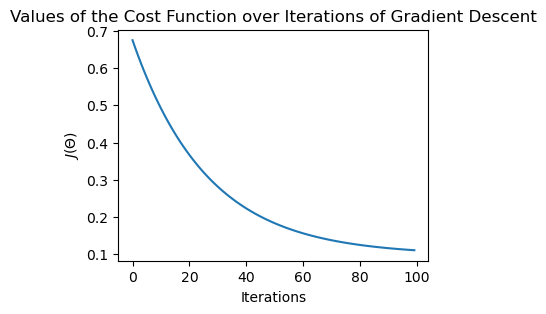

In [37]:
plt.figure(figsize = (4,3))
plt.plot(costs1)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

 This plot confirms our earlier observation that the cost approaches zero from the 20th iteration, and subsequently becomes nearly constant.

# Convergence of the cost according to the Learning rate

**Now, we will test different learning rates to identify the optimal one by analyzing the evolution of the cost with respect to the learning rate**

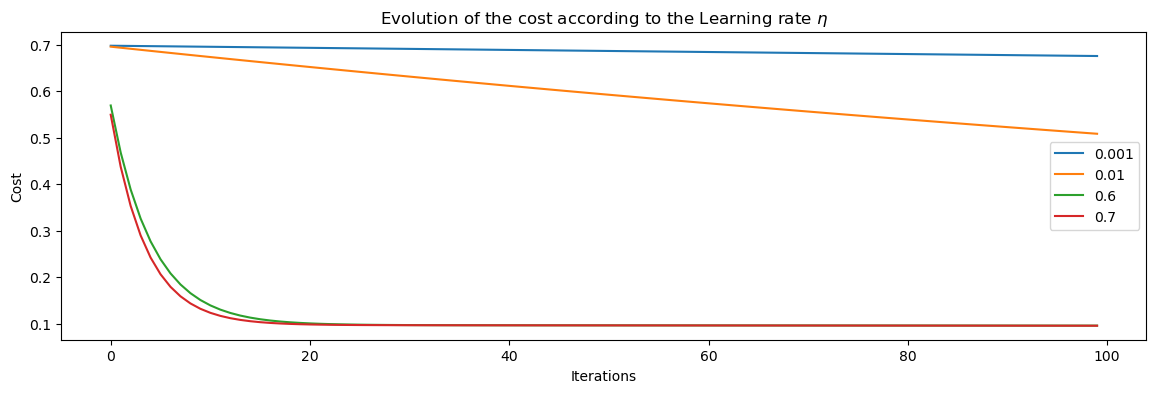

In [38]:
plt.figure(figsize = (14,4))

learning_rates=[0.001,0.01,0.6,0.7]
iterations=100
for eta in learning_rates:
    theta, costs = gradient_descent(X_train, y_train, teta, eta, iterations)
    plt.plot(costs, label=str(eta))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title("Evolution of the cost according to the Learning rate $\eta$");

**interpretation:**
- $ \eta $ in [0.001 , 0.09] : The gradient descent algorithm is taking an excessive amount of iterations to converge to the minimum value (the closest value to zero).
- $ \eta $ in [0.2 , 0.6] : The gradient descent algorithm converges to the minimum value within a few iterations, typically around 20 iterations, making it an optimal interval of steps.
- $ \eta $ > 0.7 : In this case, the gradient descent gives bad training results.

# Testing the Model

In [39]:
cost_function(X_test, y_test, theta_opt1)

0.08741241007521008

Initially, our cost was about `3.042994828459761`. However, after training our model, we achieved a cost of `0.07965627798599073`, which indicates a **significant improvement** in the performance of our model.

# Plotting variables with predected price in 3D

In [40]:
X_tensor = torch.from_numpy(X_test)
Y_tensor = torch.from_numpy(y_test)

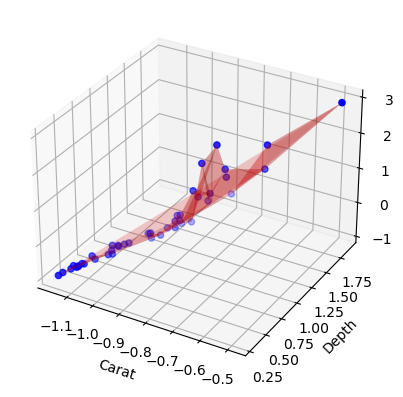

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tensor[:,1].detach().numpy(), X_tensor[:,2].detach().numpy(), Y_tensor.flatten().detach().numpy(), c='b', marker='o')
ax.plot_trisurf(X_tensor[:,1].detach().numpy(), X_tensor[:,2].detach().numpy(), Y_tensor.flatten().detach().numpy(), color='r', alpha=0.2)
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('');

# Stochastic Gradient Descent

In [42]:
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

In [43]:
def stochastic_gradient_descent (X, y, teta, eta, n_epochs):
    m=len(y)
    costs = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[ random_index:random_index + 1 ]
            yi = y[ random_index:random_index + 1 ]
            gradients = 2 * xi.T.dot(xi.dot(teta) - yi)
            eta = learning_schedule(epoch * m + i)
            teta = teta - eta * gradients
        costs.append(cost_function( X, y, teta ))
    return theta, costs

In [44]:
theta_opt2, costs2 = stochastic_gradient_descent (Xo_n, yo, teta, eta=0.1, n_epochs=5)

In [45]:
costs2

[0.0989352176450069,
 0.1063756907585066,
 0.09538822814048868,
 0.09404345287886774,
 0.09574809598824416]

Here we can observe the **powerful** potential of the stochastic gradient descent algorithm. In **just two iterations**, the cost function reaches the minimum value and subsequently becomes nearly constant, which is a remarkable achievement.

# Plotting the convergence of The Stochastic Gradient Descent Function

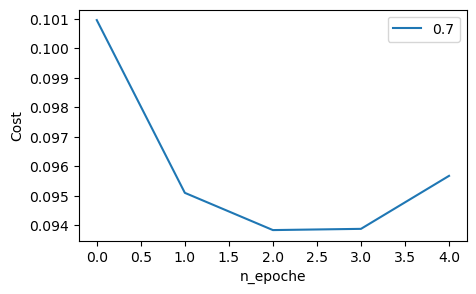

In [46]:
plt.figure(figsize = (5,3))

theta, costs = stochastic_gradient_descent (Xo_n, yo, teta, eta=0.01, n_epochs=5)
plt.plot(costs, label=str(eta))
plt.xlabel('n_epoche')
plt.ylabel('Cost')
plt.legend();

# Limitations of the Model

In this project, we have based our predictive model on two essential algorithms: the mean squared error (MSE) and the gradient descent or stochastic gradient descent. However, it is important to note that these algorithms have certain limitations when applied to our model. Here are some of them:

- **Overfiiting:** Our database has a large number of parameters, making the model complex. As a result, it may fit the training data too well and perform poorly on new, unseen data.
- **Scalability:** Another potential limitation of your model is scalability. Gradient descent and stochastic gradient descent are iterative algorithms that can be computationally expensive for large datasets or high-dimensional feature spaces. 
- **Prediction accuracy:** The accuracy of our model may also be limited by factors that are not captured in the dataset, such as market trends or economic conditions... 